In [7]:
#!/usr/bin/env python
# coding: utf-8

below is from https://medium.com/analytics-vidhya/exploratory-data-analysis-for-beginner-7488d587f1ec

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
sns.set(style="ticks")
# style = 'dark','darkgrid','whitegrid' are some other styles
filename = 'COMPLETEhydrated.csv'
directory = os.path.join('data',filename)
hydrated = pd.read_csv(directory, dtype='unicode')

We need to convert all columns into the right data type, maybe remove some unnecessary columns

In [10]:
hydrated["retweet_count"] = pd.to_numeric(hydrated["retweet_count"], downcast="integer")
hydrated["favorite_count"] = pd.to_numeric(hydrated["favorite_count"], downcast="integer")
hydrated["user_listed_count"] = pd.to_numeric(hydrated["user_listed_count"], downcast="integer")
hydrated["user_statuses_count"] = pd.to_numeric(hydrated["user_statuses _count"], downcast="integer")
hydrated["user_favorites_count"] = pd.to_numeric(hydrated["user_favourites_count"], downcast="integer")
hydrated["created_at"] = pd.to_datetime(hydrated["created_at"])

Test Field on a single user (realBenTalks)

In [11]:
testdf = hydrated
testdf=testdf.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','id_str'])

In [12]:
ben = testdf[testdf.from_user=='realBenTalks']
ben = ben.sort_values(by=['created_at'])

A plot on how many tweets Ben tweeted each week:

In [13]:
ben = ben.set_index('created_at')
weekly_tweet = ben.resample('w').count().reset_index()
weekly_tweet.created_at = weekly_tweet.created_at.dt.date

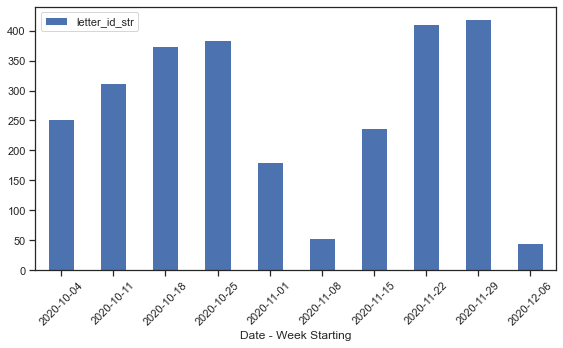

In [14]:
ax = weekly_tweet.plot(kind='bar',x='created_at',y='letter_id_str',figsize=(8,5))
ax.set_xlabel('Date - Week Starting')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Here .astype() will cast all df object as "true", instead we can use "==" to match if the content is true
# hydrated['user_verified'] = hydrated['user_verified'].astype('bool')
hydrated['user_verified'] = hydrated['user_verified'] == "True"

Don't seem to need this, if we want the sum of the verified user we can count df directly<br>
print(hydrated.isnull().values.sum())

In [15]:
hydrated['user_verified'].value_counts()

False    285221
True       7050
Name: user_verified, dtype: int64

We can also group it by selecting id_str or letter_id_str to see how many unique entires

In [16]:
hydrated.groupby('user_verified')[['id_str', 'letter_id_str']].nunique()

,id_str,letter_id_str
user_verified,,
False,113354,285220
True,7050,7050


seaborn histogram 

not really sure what categories will be useful/possible here

/Users/vaapad-soresu/PycharmProjects/VaccineTwitter/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

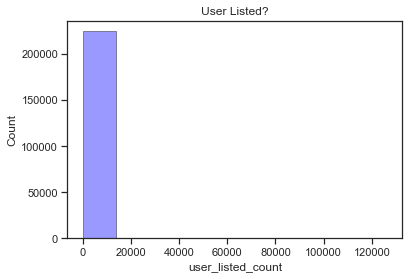

In [17]:
sns.distplot(hydrated['user_listed_count'], hist=True, kde=False, 
             bins=9, color='blue',
             hist_kws={'edgecolor': 'black'})
# Add labels
plt.title('User Listed?')
plt.xlabel('user_listed_count')
plt.ylabel('Count')

<AxesSubplot:ylabel='user_verified'>

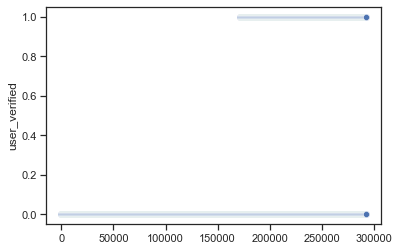

In [18]:
sns.scatterplot(x=np.linspace(1, 292271, num=292271), y=hydrated['user_verified'])
# (x=hydrated['user_verified'], y=hydrated['user_statuses_count'])

Heat map pearson correlation matrix

<AxesSubplot:>

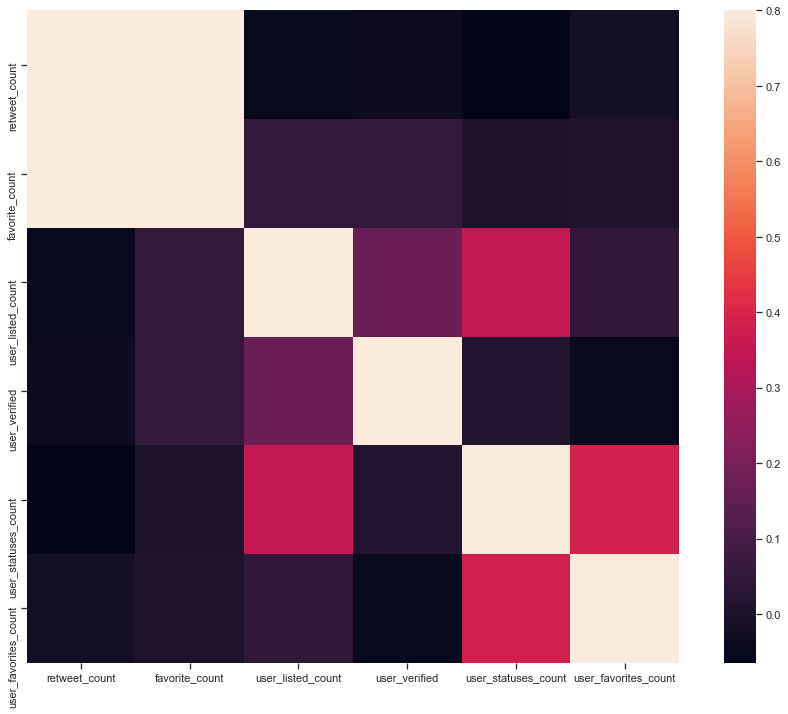

In [19]:
corrmat = hydrated.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

Light color, i.e., see on the right, scale 0.8 is highly correlated,<br>
and darker color below or around -0.2 is not correlated.

Your heatmap is correct, you just forgot to change the dataframe name from pottermerged --> hydrated

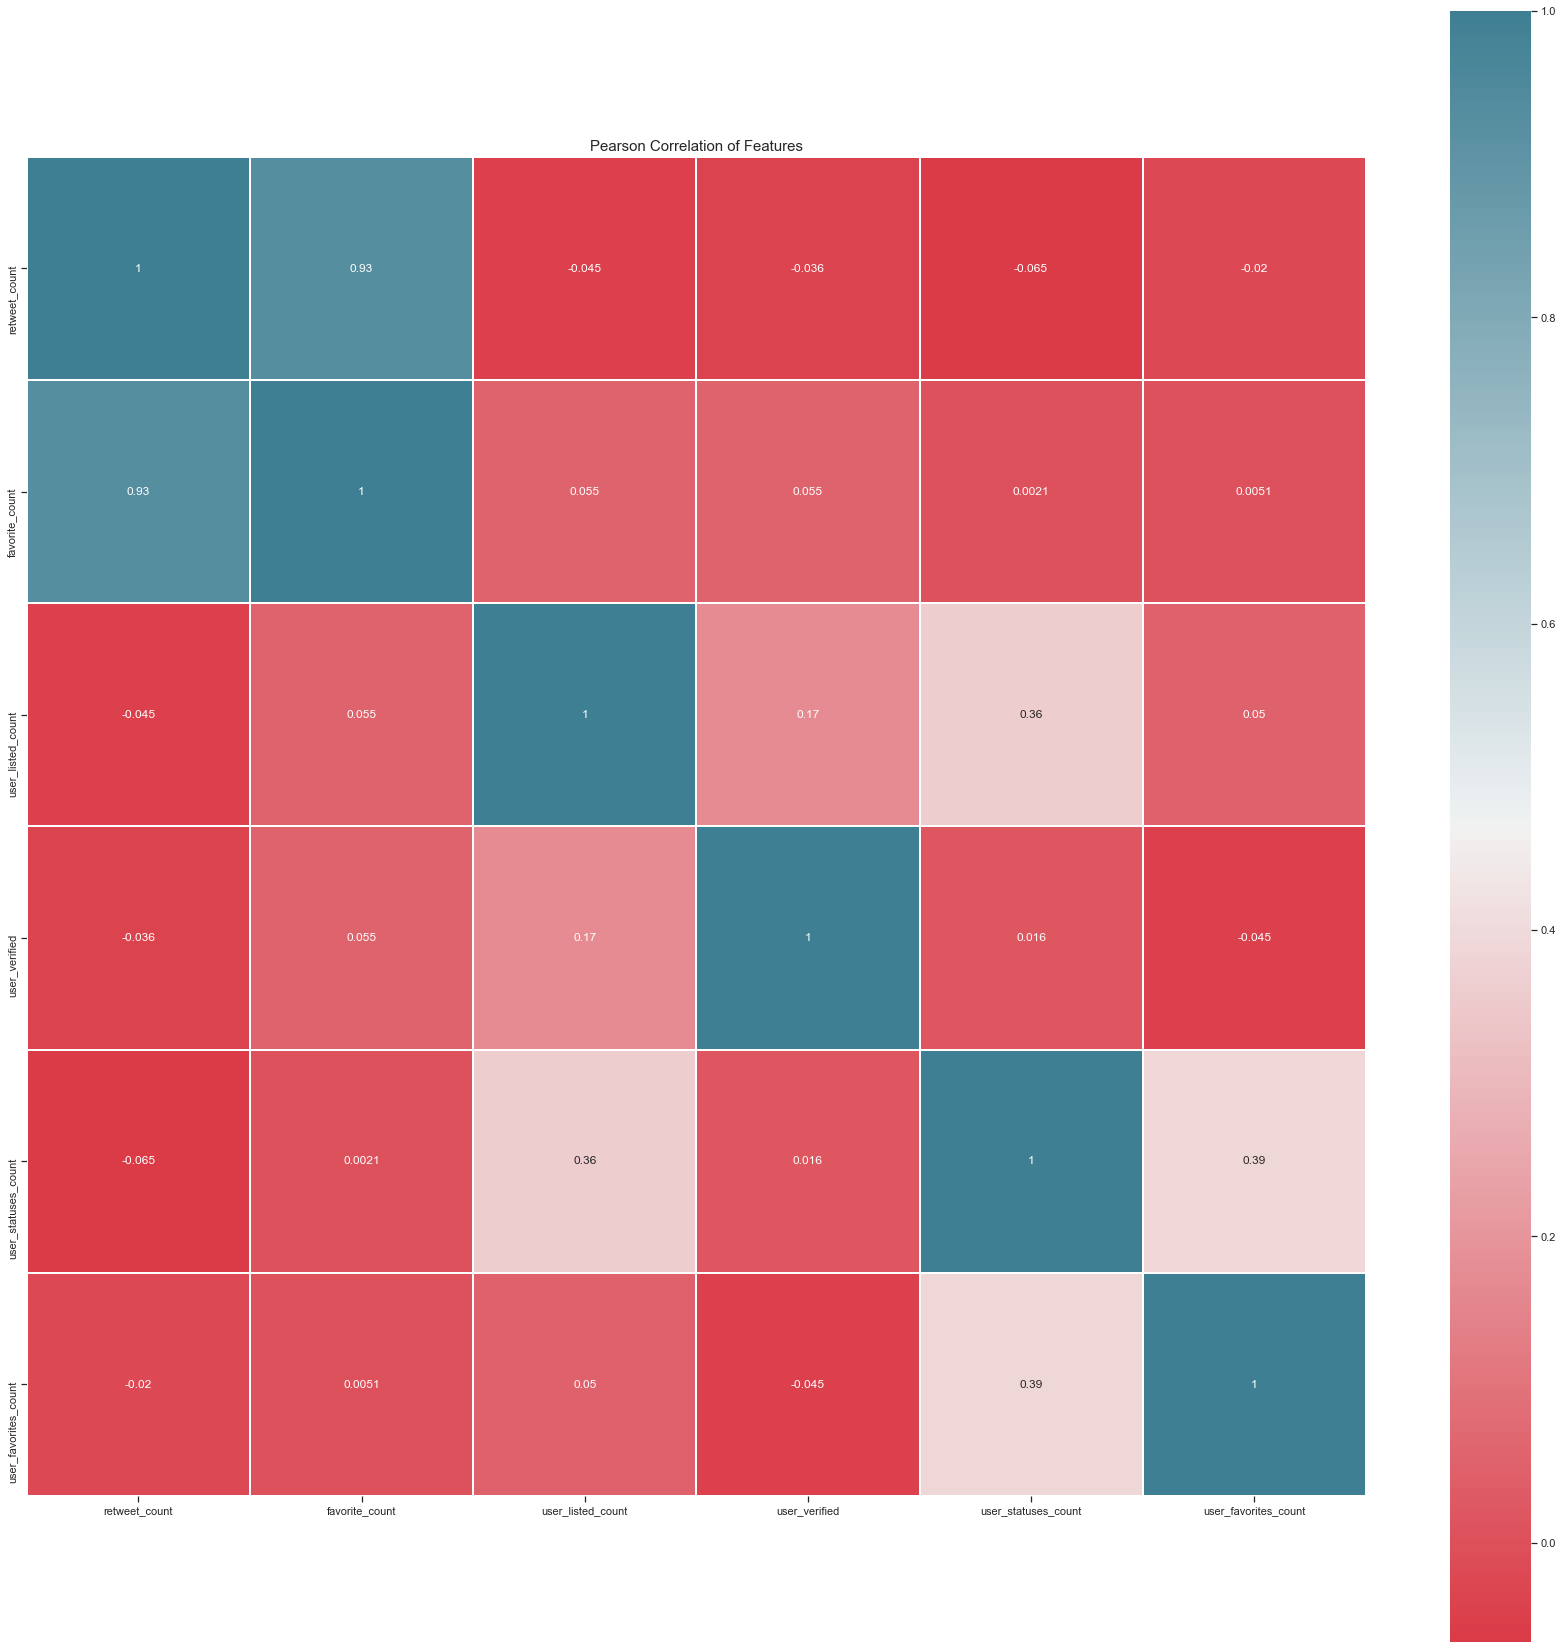

In [20]:
plt.figure(figsize=(30, 30))
plt.title('Pearson Correlation of Features', size=15)
colormap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(hydrated.corr(),
            cmap=colormap,
            square=True,
            annot=True,
            linewidths=0.1, vmax=1.0, linecolor='white',
            annot_kws={'fontsize': 12})
plt.show()

In above correlation matrix, we printed the number also so it will be easy for us<br>
to see which are highly correlated and value close to 1.00 is highly correlated.